# 3. A Tour of Machine Learning Classifiers Using Scikit-learn

In [72]:
%matplotlib inline
from sklearn import datasets
import numpy as np
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 13
mpl.rcParams['font.family'] = 'Osaka'
np.set_printoptions(linewidth=200)
np.set_printoptions(precision=3)

# 3.1 First steps with scikit-learn

## Iris dataset

scikit-learnのiris datasetを使う.   
Setosa, Versicolour, and Virginicaの3種から成る, Sepal Length, Sepal Width, Petal Length and Petal Widthのデータセットで, サンプルサイズは150.

今回は花弁の長さ, 幅のデータだけを使う.

詳細: [http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

In [3]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

変数は
* X: list of (petal length, petal width)  
* y: 0 if setosa, 1 if versicolour, 2 if virginica 

In [79]:
print(X[40:60])
print(y[40:60])

[[ 1.3  0.3]
 [ 1.3  0.3]
 [ 1.3  0.2]
 [ 1.6  0.6]
 [ 1.9  0.4]
 [ 1.4  0.3]
 [ 1.6  0.2]
 [ 1.4  0.2]
 [ 1.5  0.2]
 [ 1.4  0.2]
 [ 4.7  1.4]
 [ 4.5  1.5]
 [ 4.9  1.5]
 [ 4.   1.3]
 [ 4.6  1.5]
 [ 4.5  1.3]
 [ 4.7  1.6]
 [ 3.3  1. ]
 [ 4.6  1.3]
 [ 3.9  1.4]]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


In [5]:
np.unique(y)

array([0, 1, 2])

## Split sample for train and test

In [6]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

105 45 105 45


## Scaling data using StandardScaler

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [51]:
print(X_train[:5])
print("Mean: ", np.mean(X_train), ", Std: ", np.std(X_train))

[[ 3.5  1. ]
 [ 5.5  1.8]
 [ 5.7  2.5]
 [ 5.   1.5]
 [ 5.8  1.8]]
Mean:  2.52761904762 , Std:  1.89937309147


In [52]:
print(X_train_std[:5])
print("Mean: ", np.mean(X_train_std), ", Std: ", np.std(X_train_std))

[[-0.183 -0.291]
 [ 0.931  0.737]
 [ 1.042  1.637]
 [ 0.652  0.351]
 [ 1.098  0.737]]
Mean:  -2.53765262771e-16 , Std:  1.0


## Training Perceptron using scikit-learn

3値を分類するので, 単純なパーセプトロンに少し手を加える必要がある. scikit-learnの多くの分類アルゴリズムはデフォルトで多値分類に対応していて, その方法はOne vs Rest method というもの. これは,  

* クラスが0なら0, 1or2なら1を返すパーセプトロン
* クラスが1なら0, 0or2なら1を返すパーセプトロン
* クラスが2なら0, 0or1なら1を返すパーセプトロン

の3つを作って分類しようというもの. 線形分離可能でなければ, 当然いずれか1つのクラスは分類できない場合がある.

One vs One method というのもあり, こちらは 0or1, 2or3, 01 or 23 のように分ける方法.

### 実験結果を再現可能にするため, 擬似乱数を使う際はrandom stateを設定する.

using random state object(seed=1)

In [61]:
from sklearn.linear_model import Perceptron

seed = 1
rs = np.random.RandomState(seed)
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=rs)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)

total = len(y_test)
misclassified = (y_test != y_pred).sum()
print("True y:     ", y_test[:20])
print("Predict y: ", y_pred[:20])
print("Total size: {}, Misclassified: {}, Error: {:.5f}, Accuracy: {:.5f}".format(total, misclassified, misclassified/total, 1-misclassified/total) )

True y:      [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0]
Predict y:  [2 1 0 2 0 2 0 1 1 1 1 1 1 1 1 0 1 1 0 0]
Total size: 45, Misclassified: 2, Error: 0.04444, Accuracy: 0.95556


try another seed=20161021

In [62]:
seed = 20161021
rs = np.random.RandomState(seed)
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=rs)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)

total = len(y_test)
misclassified = (y_test != y_pred).sum()
print("True y:     ", y_test[:20])
print("Predict y: ", y_pred[:20])
print("Total size: {}, Misclassified: {}, Error: {:.5f}, Accuracy: {:.5f}".format(total, misclassified, misclassified/total, 1-misclassified/total) )

True y:      [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0]
Predict y:  [2 1 1 2 1 2 1 2 2 1 2 2 1 2 1 1 2 1 1 1]
Total size: 45, Misclassified: 24, Error: 0.53333, Accuracy: 0.46667


try same seed and n_iter=60

In [63]:
seed = 20161021
rs = np.random.RandomState(seed)
ppn = Perceptron(n_iter=60, eta0=0.1, random_state=rs)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)

total = len(y_test)
misclassified = (y_test != y_pred).sum()
print("True y:     ", y_test[:20])
print("Predict y: ", y_pred[:20])
print("Total size: {}, Misclassified: {}, Error: {:.5f}, Accuracy: {:.5f}".format(total, misclassified, misclassified/total, 1-misclassified/total) )

True y:      [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0]
Predict y:  [2 1 0 2 0 2 0 1 1 1 1 1 1 1 1 0 1 1 0 0]
Total size: 45, Misclassified: 1, Error: 0.02222, Accuracy: 0.97778


sklearn has accuracy_score method

In [60]:
from sklearn.metrics import accuracy_score

print("{:.5f}".format(accuracy_score(y_test, y_pred)))

0.97778


## 決定境界を描画する

In [73]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    fig, axes = plt.subplots(figsize=(16, 9))
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', alpha=1.0, linewidth=1, marker='o', s=55, label='test set')
        
    plt.xlabel('petal length [standardized]')
    plt.ylabel('petal width [standardized]')
    plt.legend(loc='upper left')
    plt.show()

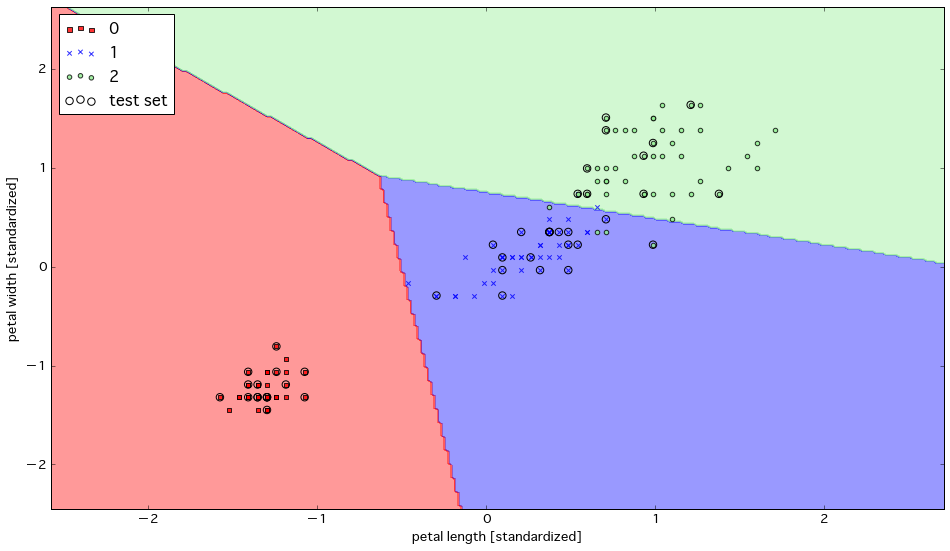

In [74]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105,150))

# 3.2 Modeling class probabilities via logistic regression

このデータセットは線形分離不可能なので, パーセプトロンの重みの更新は収束しない.

In [102]:
for n_iter in range(10, 201, 10):
    rs = np.random.RandomState(1021)
    ppn = Perceptron(n_iter=n_iter, eta0=0.1, random_state=rs)
    ppn.fit(X_train_std, y_train)
    y_pred = ppn.predict(X_test_std)

    total = len(y_test)
    misclassified = (y_test != y_pred).sum()
    print("Itertimes: {:03d}, Total size: {}, Misclassified: {:02d}, Accuracy: {:.5f}".format(n_iter, total, misclassified, 1-misclassified/total) )

Itertimes: 010, Total size: 45, Misclassified: 02, Accuracy: 0.95556
Itertimes: 020, Total size: 45, Misclassified: 22, Accuracy: 0.51111
Itertimes: 030, Total size: 45, Misclassified: 04, Accuracy: 0.91111
Itertimes: 040, Total size: 45, Misclassified: 06, Accuracy: 0.86667
Itertimes: 050, Total size: 45, Misclassified: 06, Accuracy: 0.86667
Itertimes: 060, Total size: 45, Misclassified: 01, Accuracy: 0.97778
Itertimes: 070, Total size: 45, Misclassified: 03, Accuracy: 0.93333
Itertimes: 080, Total size: 45, Misclassified: 10, Accuracy: 0.77778
Itertimes: 090, Total size: 45, Misclassified: 14, Accuracy: 0.68889
Itertimes: 100, Total size: 45, Misclassified: 01, Accuracy: 0.97778
Itertimes: 110, Total size: 45, Misclassified: 22, Accuracy: 0.51111
Itertimes: 120, Total size: 45, Misclassified: 01, Accuracy: 0.97778
Itertimes: 130, Total size: 45, Misclassified: 06, Accuracy: 0.86667
Itertimes: 140, Total size: 45, Misclassified: 04, Accuracy: 0.91111
Itertimes: 150, Total size: 45, Mi

代わりにロジスティック回帰を使う. 元々は2クラス分類の方法だが, One vs Rest method により多クラス分類に拡張できる.

ロジスティック関数は以下のような形状. $\phi(z): R \to [0, 1]$

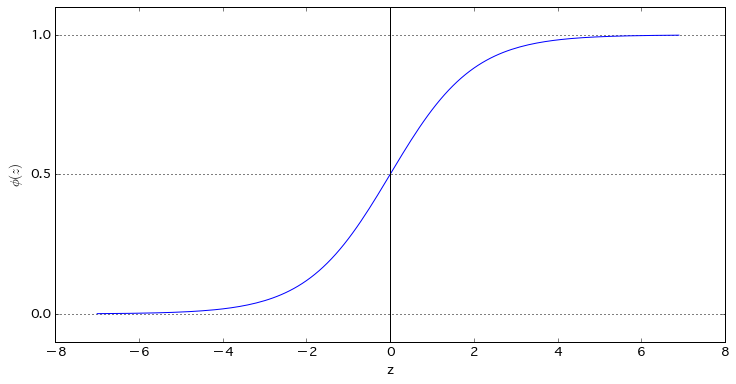

In [104]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

fig, axes = plt.subplots(figsize=(12, 6))
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()

## 決定境界を描画

3つのロジットモデルで, それぞれのクラスである確率が0.5を超える境界を描画

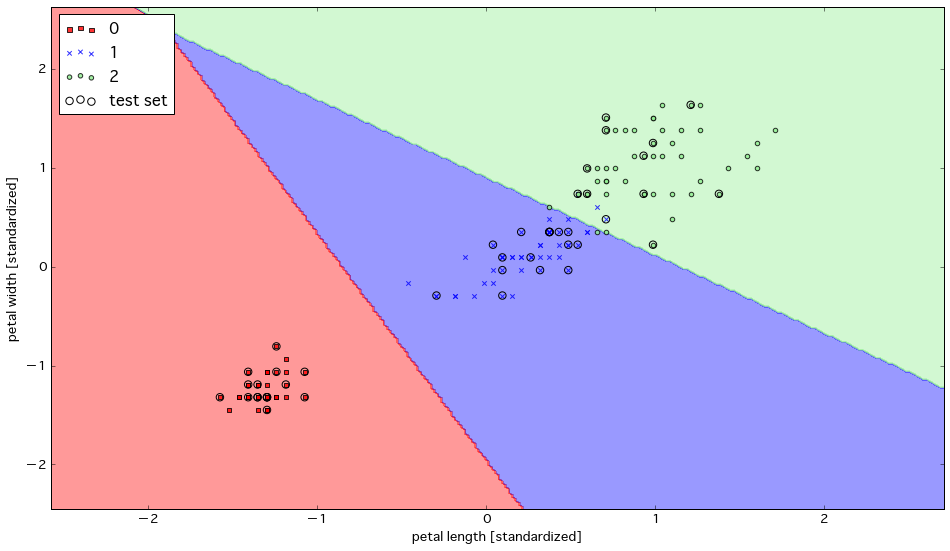

In [106]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,150))

In [114]:
print(lr.predict_proba(X_test_std[0, :]))
print(lr.predict_proba(X_test_std[1, :]))
print(lr.predict_proba(X_test_std[2, :]))

[[  2.057e-11   6.316e-02   9.368e-01]]
[[  6.088e-04   9.993e-01   1.057e-04]]
[[  8.170e-01   1.830e-01   6.483e-14]]


/Users/akira/.pyenv/versions/anaconda3-2.1.0/lib/python3.4/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/akira/.pyenv/versions/anaconda3-2.1.0/lib/python3.4/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/akira/.pyenv/versions/anaconda3-2.1.0/lib/python3.4/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has

## L2正則化項を入れた場合

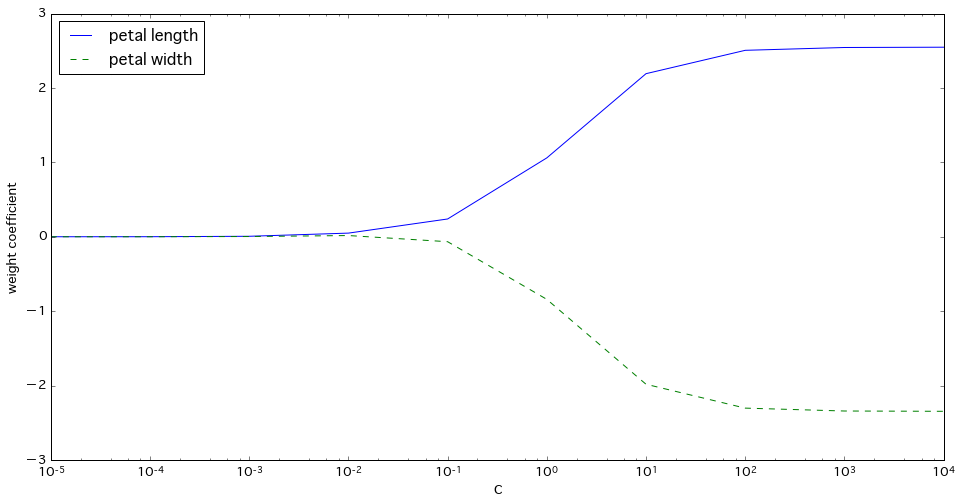

In [117]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
    
weights = np.array(weights)
fig, axes = plt.subplots(figsize=(16, 8))
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')

# 3.3 Maximum margin classification with support vector machines

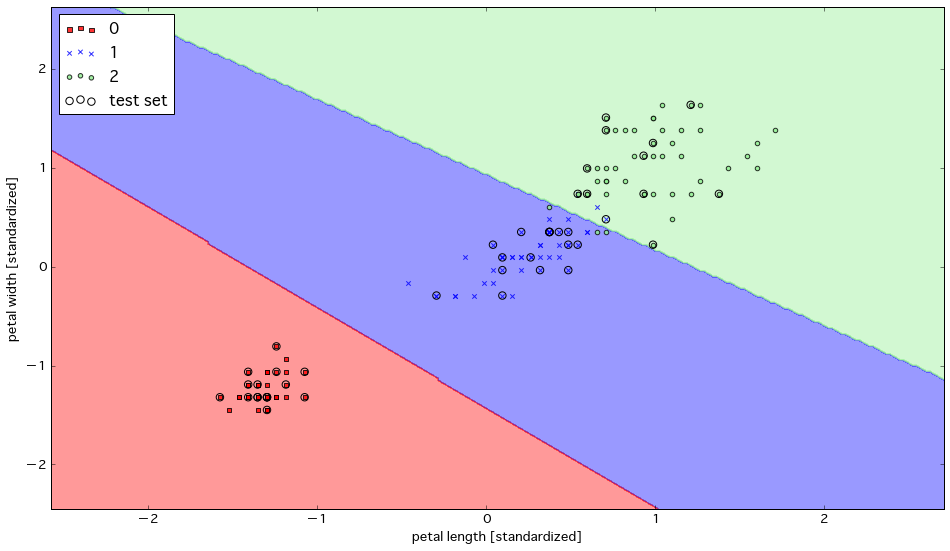

In [119]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))